<a href="https://colab.research.google.com/github/YuriQuisbert/Netflix/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*desenvolvido por:*


<img alt="Colaboratory logo" width="25%" src="https://github.com/YuriQuisbert/pessoal/blob/main/Yuri%20Quisbert..png?raw=true">

---
🚀 [*yuriquisbert.com.br*](yuriquisbert.com.br)

---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titulos = pd.read_csv('https://raw.githubusercontent.com/YuriQuisbert/DataBases/main/titles.csv')

In [ ]:
titulos = titulos.drop(columns = ['id','description', 'imdb_id'])

In [ ]:
colunas = ['titulo', 'tipo','ano_producao', 'idade_recomendada', 'duracao', 'generos', 'pais_producao', 'temporadas', 'nota_imdb', 'votos_imdb', 'popularidade_tmdb', 'nota_tmdb']

titulos.columns = colunas

In [ ]:
titulos.head()

,titulo,tipo,ano_producao,idade_recomendada,duracao,generos,pais_producao,temporadas,nota_imdb,votos_imdb,popularidade_tmdb,nota_tmdb
0,Five Came Back: The Reference Films,SHOW,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,0.600,NaN
1,Taxi Driver,MOVIE,1976,R,114,"['drama', 'crime']",['US'],NaN,8.2,808582.0,40.965,8.179
2,Deliverance,MOVIE,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,7.7,107673.0,10.010,7.300
3,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,8.2,534486.0,15.461,7.811
4,The Dirty Dozen,MOVIE,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,7.7,72662.0,20.398,7.600


In [ ]:
titulos.isnull().sum()

titulo                  1
tipo                    0
ano_producao            0
idade_recomendada    2619
duracao                 0
generos                 0
pais_producao           0
temporadas           3744
nota_imdb             482
votos_imdb            498
popularidade_tmdb      91
nota_tmdb             311
dtype: int64

In [ ]:
titulos = titulos.fillna({'idade_recomendada':'Não Definido', 'temporadas': 0, 'nota_imdb': -1, 'votos_imdb': -1, 'popularidade_tmdb': -1, 'nota_tmdb': -1})

In [ ]:
titulos.isnull().sum()

titulo               1
tipo                 0
ano_producao         0
idade_recomendada    0
duracao              0
generos              0
pais_producao        0
temporadas           0
nota_imdb            0
votos_imdb           0
popularidade_tmdb    0
nota_tmdb            0
dtype: int64

In [ ]:
titulos = titulos.dropna(subset = ['titulo'], axis = 0)

In [ ]:
titulos.idade_recomendada.unique()

array(['TV-MA', 'R', 'PG', 'Não Definido', 'TV-14', 'PG-13', 'TV-PG',
       'TV-Y', 'TV-G', 'TV-Y7', 'G', 'NC-17'], dtype=object)

* `G` - Livre
* `TV-G` - Livre
* `TV-Y` - Infantil
* `TV-PG` - Proibido para menores de 10 anos
* `TV-Y7` - Proibido para menores de 10 anos
* `PG` - Proibido para menores de 10 anos
* `TV-14` - Proibido para menores de 14 anos
* `PG-13` - Proibido para menores de 14 anos
* `TV-MA` - Proibido para menores de 18 anos
* `R` - Proibido para menores de 18 anos
* `NC-17` - Proibido para menores de 18 anos
---
* `L` - Livre 
* `Infantil` - Infantil
* `+10` - Proibido para menores de 10 anos
* `+14` - Proibido para menores de 14 anos
* `+18` - Proibido para menores de 18 anos











In [ ]:
titulos['idade_recomendada'] = titulos.idade_recomendada.map({'TV-MA':'+18',
                                                              'R':'+18',
                                                              'PG':'+10',
                                                              'TV-14':'+14',
                                                              'PG-13':'+14',
                                                              'TV-PG':'+10',
                                                              'TV-Y':'Infantil',
                                                              'TV-G':'Livre',
                                                              'TV-Y7':'+10',
                                                              'G':'Livre',
                                                              'NC-17':'+18',
                                                              'Não Definido':'Não Definido'})

In [ ]:
lista = []
contador = []

for i in titulos.pais_producao:
  i = i.replace('[','')
  i = i.replace(']','')
  i = i.replace("'", "")
  i = i.split(', ')
  lista.append(i)

titulos['pais_producao'] = lista

In [ ]:
lista = []
contador = []

for i in titulos.generos:
  i = i.replace('[','')
  i = i.replace(']','')
  i = i.replace("'", "")
  i = i.split(', ')
  lista.append(i)

titulos['generos'] = lista

In [ ]:
paises = []

for i in titulos.pais_producao:
  for n in i:
    paises.append(n)

In [ ]:
generos = []

for i in titulos.generos:
  for n in i:
    generos.append(n)

In [ ]:
paises = pd.DataFrame(paises)


In [ ]:
generos = pd.DataFrame(generos)

In [ ]:
titulos

,titulo,tipo,ano_producao,idade_recomendada,duracao,generos,pais_producao,temporadas,nota_imdb,votos_imdb,popularidade_tmdb,nota_tmdb
0,Five Came Back: The Reference Films,SHOW,1945,+18,51,[documentation],[US],1.0,-1.0,-1.0,0.600,-1.000
1,Taxi Driver,MOVIE,1976,+18,114,"[drama, crime]",[US],0.0,8.2,808582.0,40.965,8.179
2,Deliverance,MOVIE,1972,+18,109,"[drama, action, thriller, european]",[US],0.0,7.7,107673.0,10.010,7.300
3,Monty Python and the Holy Grail,MOVIE,1975,+10,91,"[fantasy, action, comedy]",[GB],0.0,8.2,534486.0,15.461,7.811
4,The Dirty Dozen,MOVIE,1967,Não Definido,150,"[war, action]","[GB, US]",0.0,7.7,72662.0,20.398,7.600
...,...,...,...,...,...,...,...,...,...,...,...,...
5845,Fine Wine,MOVIE,2021,Não Definido,100,"[romance, drama]",[NG],0.0,6.8,45.0,1.466,-1.000
5846,C/O Kaadhal,MOVIE,2021,Não Definido,134,[drama],[],0.0,7.7,348.0,-1.000,-1.000
5847,Lokillo,MOVIE,2021,Não Definido,90,[comedy],[CO],0.0,3.8,68.0,26.005,6.300
5848,Dad Stop Embarrassing Me - The Afterparty,MOVIE,2021,+14,37,[],[US],0.0,-1.0,-1.0,1.296,10.000


In [ ]:
titulos.idade_recomendada.value_counts()

Não Definido    2618
+18             1455
+14              925
+10              541
Livre            203
Infantil         107
Name: idade_recomendada, dtype: int64

In [ ]:
titulos.temporadas.value_counts().head(10)

0.0    3743
1.0    1221
2.0     389
3.0     187
4.0     120
5.0      79
6.0      36
7.0      18
8.0      11
9.0       9
Name: temporadas, dtype: int64

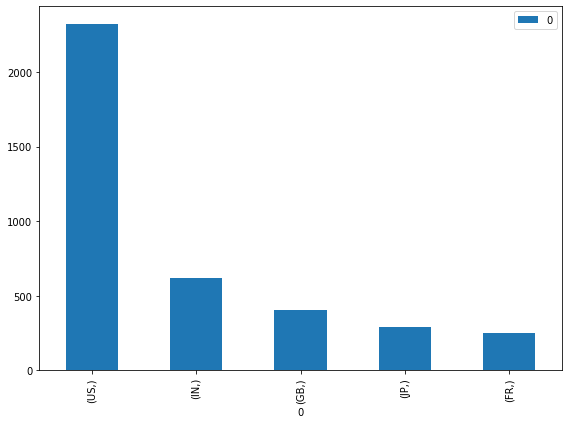

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

pd.DataFrame(paises.value_counts()).head(5).plot(y=0, kind="bar", ax=ax)

plt.tight_layout()

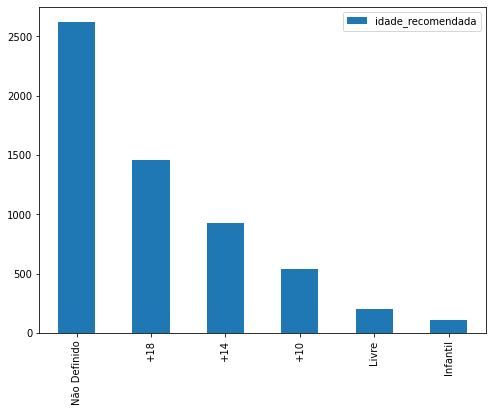

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
pd.DataFrame(titulos.idade_recomendada.value_counts()).plot(y=0, kind="bar", ax=ax)
plt.show()

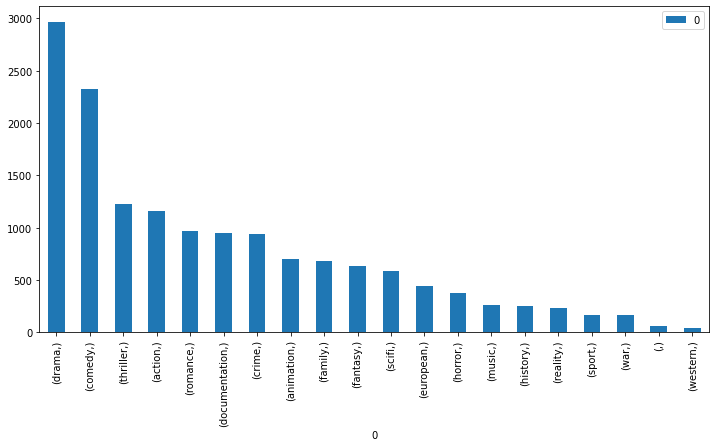

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
pd.DataFrame(generos.value_counts()).plot(y=0, kind="bar", ax=ax)
plt.show()

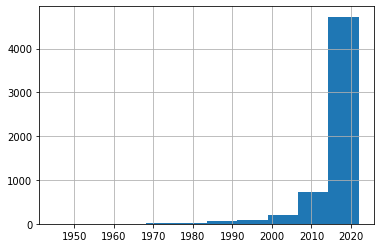

In [ ]:
titulos['ano_producao'].hist();

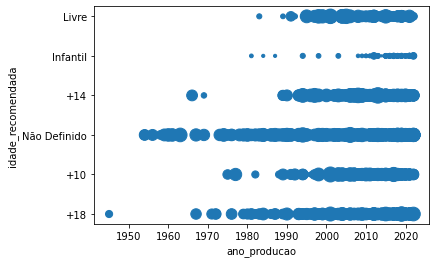

In [ ]:
fig, ax = plt.subplots()

titulos.plot.scatter(x='ano_producao', y='idade_recomendada', ax=ax, s='duracao') #tamanho

plt.show()